# Neural Network Classification with TensorFlow

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

- Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
- Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
- Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.
  
In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

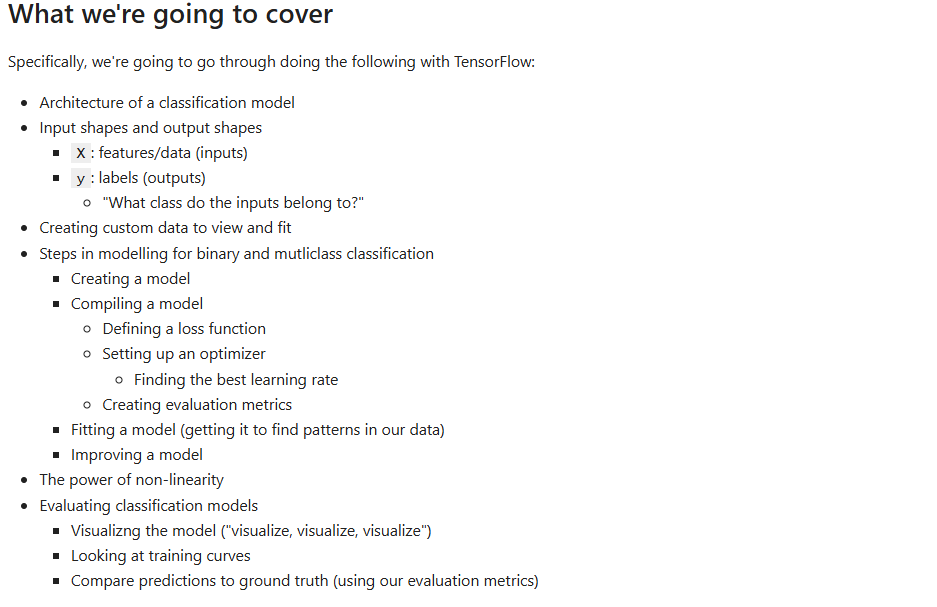

### Typical Architecture Of A Classification Neural Network

The word typical is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:

- An input layer.
- Some hidden layers.
- An output layer.
  
Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

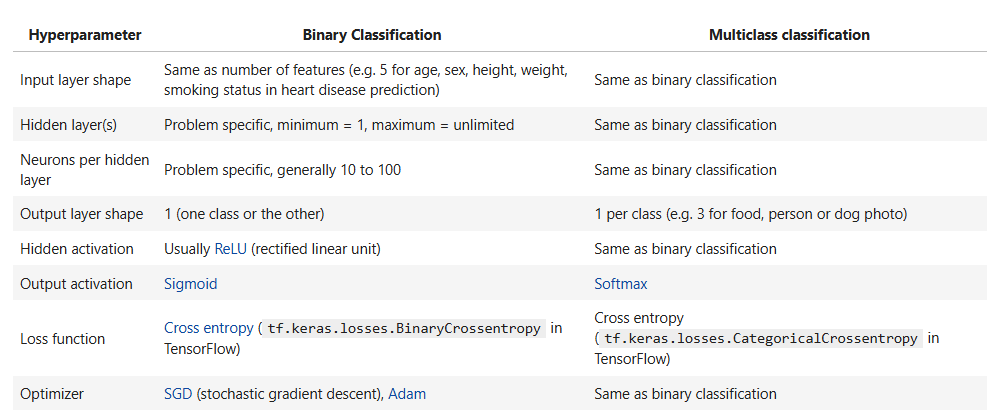

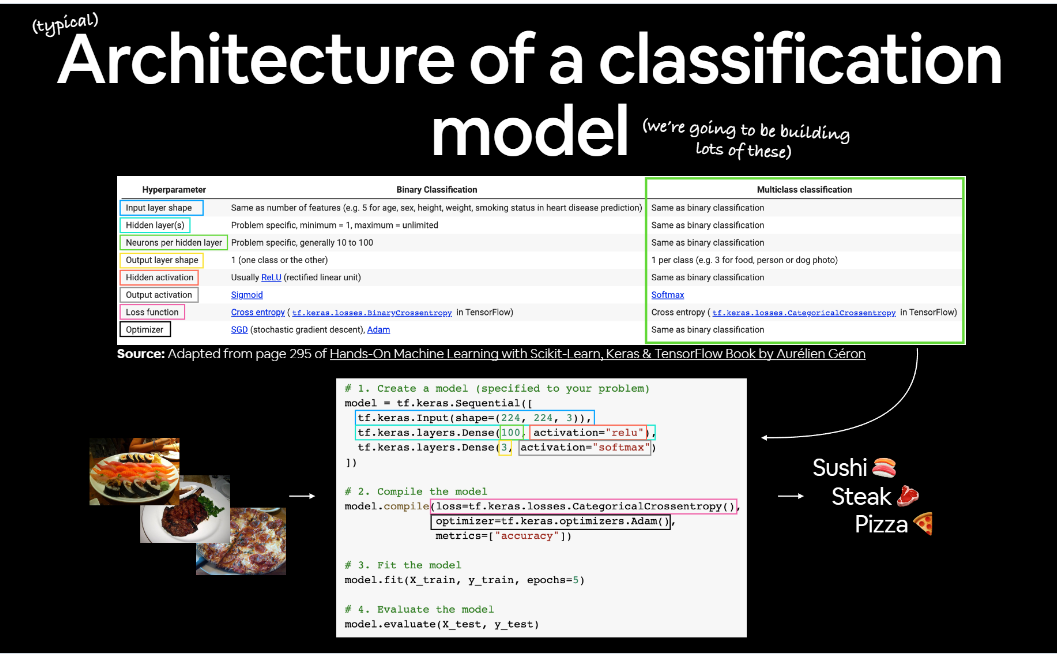

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles 

# Create Circles 
X , y = make_circles(n_samples = 1000 , noise=0.03 , random_state=42)


In [2]:
# Check Out The Features 
X  , y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [3]:
import pandas as pd 

circles = pd.DataFrame({"X0": X[:,0] , "X1":X[:,1] , "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


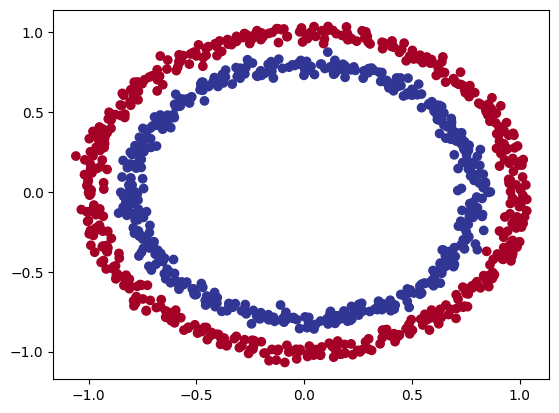

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
X.shape , y.shape

((1000, 2), (1000,))

In [6]:
len(X) , len(y)

(1000, 1000)

In [7]:
X[0] , y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

- Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
- Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
- Fitting a model - letting the model try to find patterns in the data (how does X get to y).

##### Model-1

In [8]:
import tensorflow as tf

In [9]:
# Setting the seed 
tf.random.set_seed(42)

# Creating the Model 
model_1= tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# Compile the Model 
model_1.compile(
    optimizer= tf.keras.optimizers.SGD(),
    loss= tf.keras.losses.BinaryCrossentropy,
    metrics =["accuracy"]
)


In [10]:
# fit the Model 
model_1.fit(X , y , epochs=10)

model_1.evaluate(X,y)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4179 - loss: 4.1020 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4705 - loss: 0.7912
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4687 - loss: 0.7280
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 0.7090
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4674 - loss: 0.7016
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4661 - loss: 0.6983
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4611 - loss: 0.6967
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4386 - loss: 0.6959
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4374 - loss: 0.6954
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4233 - loss: 0.6952
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4928 - loss: 0.6926


[0.693324625492096, 0.4790000021457672]

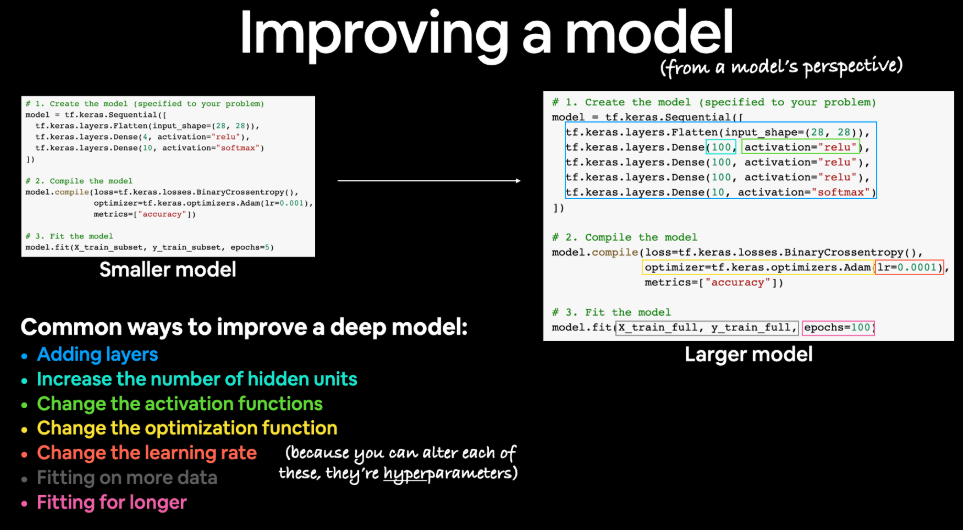

##### Let's increase the Number of Epochs and see whthere accuracy imporves or not ?

In [11]:
# fit the Model 
model_1.fit(X , y , epochs=100) # Rerun the model building and compiling cell
model_1.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4419 - loss: 0.6950
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4441 - loss: 0.6950
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4349 - loss: 0.6949
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4365 - loss: 0.6949
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4331 - loss: 0.6949
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4288 - loss: 0.6949
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4281 - loss: 0.6949
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4267 - loss: 0.6949
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4274 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4274 - loss: 0.6948
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4274 - loss: 0.6948
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

[0.6932879686355591, 0.4729999899864197]

In [12]:
# We can Clearly see these is not much improvement in the model 

##### Let's an extra layer and check whether our model improves or not ?

##### Model-2

In [13]:
# set the seed 
tf.random.set_seed(42)

# Build The Model 
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# Compile the Model 
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

In [14]:
# Fit the Model 
model_2.fit(X,y , epochs=100)

# Evaluate the Model 
model_2.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4458 - loss: 4.4072 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4655 - loss: 0.7958
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4625 - loss: 0.7332
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4632 - loss: 0.7135
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4649 - loss: 0.7048
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 0.7003
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4704 - loss: 0.6979
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 0.6966
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 0.6958
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4518 - loss: 0.6953
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4480 - loss: 0.6950 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

[0.6932263374328613, 0.4740000069141388]

##### We can clearly see the accuracy  drecreased , even after increasing the number of Layers !!

##### Let's change the optmizer function ?
- From SGD() to Adam  and check
- And increase the neural network layer . 

In [15]:
# set the seed 
tf.random.set_seed(42)

# Build The Model 
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

# Compile the Model 
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

In [16]:
# Fit the Model 
model_2.fit(X,y , epochs=100)

# Evaluate the Model 
model_2.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4903 - loss: 5.3339
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 6.6389
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 6.9256
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 6.9900
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5118 - loss: 6.9750
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5118 - loss: 6.9754
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 6.9673
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5342 - loss: 6.9345
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss: 6.9334
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5307 - loss: 6.9069
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 6.9016
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

[0.6989279389381409, 0.4860000014305115]

**Still the accuracy is 50% => It is not good as our model is simply guessing !!**

**Let's Visualize !!**
- The decision boundry

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

- Takes in a trained model, features (X) and labels (y).
- Creates a meshgrid of the different X values.
- Makes predictions across the meshgrid.
- Plots the predictions as well as a line between the different zones (where each unique class falls).

In [17]:
import numpy as np

In [26]:
def plot_boundry(model , X , y): 
    '''
    Plots the decision boundry created by a model predicting on X.
    
    '''
    #Define the axis boundries of the plot and create a meshgrid 
    x_min , x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1 
    y_min , y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1

    # Create X values (we're going to predict on all of these)
    xx , yy = np.meshgrid(np.linspace(x_min , x_max , 100),np.linspace(y_min , y_max , 100))

    x_in =  np.c_[xx.ravel() , yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)


    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
      print("doing multiclass classification...")
      # We have to reshape our predictions to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classifcation...")
      y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

     # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


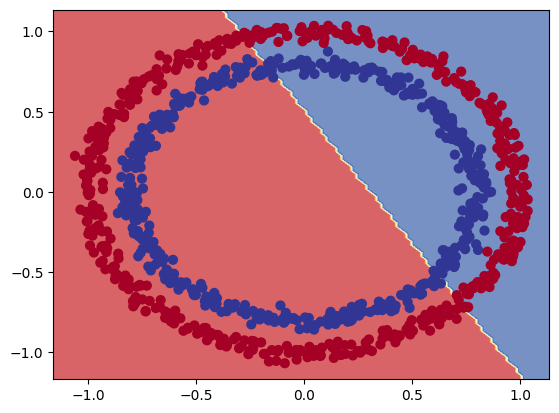

In [19]:
plot_boundry(model_2,X,y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 608.8981 - mae: 608.8981
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 513.1580 - mae: 513.1580 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 418.1488 - mae: 418.1488
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 322.1855 - mae: 322.1855
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 223.1562 - mae: 223.1562
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 118.7246 - mae: 118.7246 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.7014 - mae: 45.7014
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 78.9426 - mae: 78.9426
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.8539 - mae: 71.8539
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 46.4595 - mae: 46.4595
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 47.0265 - mae: 47.0265
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.0692 - mae: 41.0692
Epoch 13/100

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


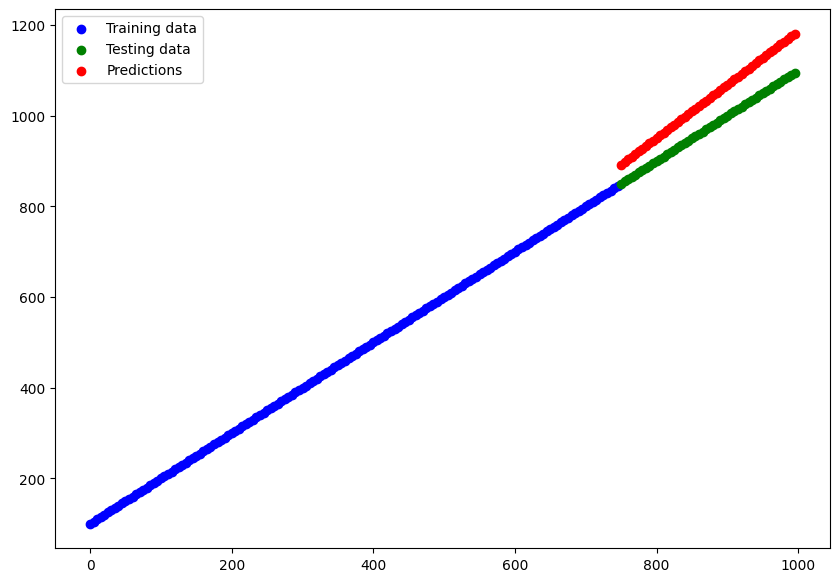

In [23]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

- The main change we'll add to models we've built before is the use of the activation keyword.

In [24]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4769 - loss: 6.9282
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4741 - loss: 6.9086
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4751 - loss: 6.8916
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4746 - loss: 6.8886
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4748 - loss: 6.8865
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4748 - loss: 6.8844
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4748 - loss: 6.8826
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4748 - loss: 6.8808
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 6.8547
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 6.8461
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 6.8441
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


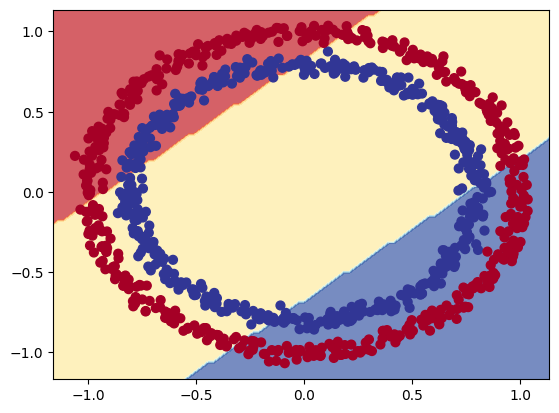

In [29]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_boundry(model_4, X, y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


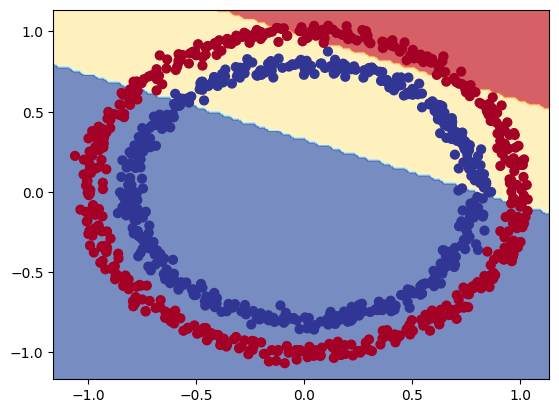

In [31]:
plot_boundry(model_5, X, y)

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4706 - loss: 5.4420
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4320 - loss: 5.1089
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4626 - loss: 4.2938
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4814 - loss: 3.0945
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 2.7014
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 1.8419
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4916 - loss: 1.0587
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4885 - loss: 1.0332
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4861 - loss: 1.0176
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss: 1.0041
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4821 - loss: 0.9919
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


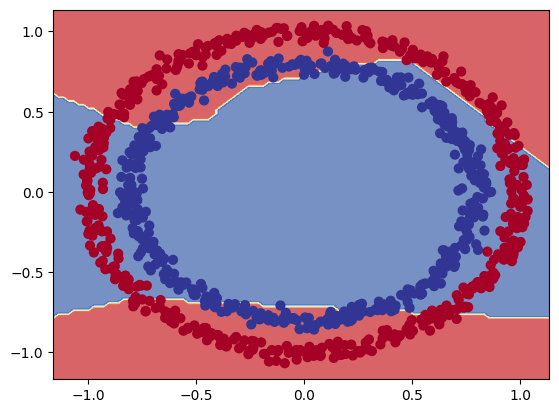

In [34]:
# Check out the predictions using 2 hidden layers
plot_boundry(model_6, X, y)

What gives?

It seems like our model is the same as the one in the TensorFlow Playground but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.

- This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [37]:
#Set the seed 
tf.random.set_seed(42)

# Create the model 
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(1 , activation=tf.keras.activations.sigmoid)) # since it is Binary Clssification , we will use relu function here .

# Compile the Model 

model_7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

# fit te model 
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5366 - loss: 0.6974
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5364 - loss: 0.6826
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6090 - loss: 0.6705
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 0.6518
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7256 - loss: 0.6207
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.5749
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.5104
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9283 - loss: 0.4314
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9783 - loss: 0.3416
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.2625
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.2061
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [39]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0152


[0.0155609967187047, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


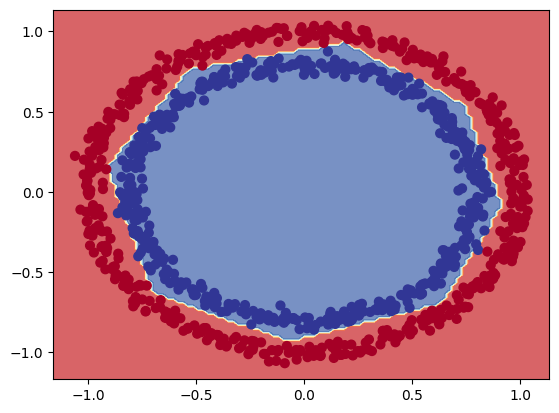

In [38]:
plot_boundry(model_7 , X , y)

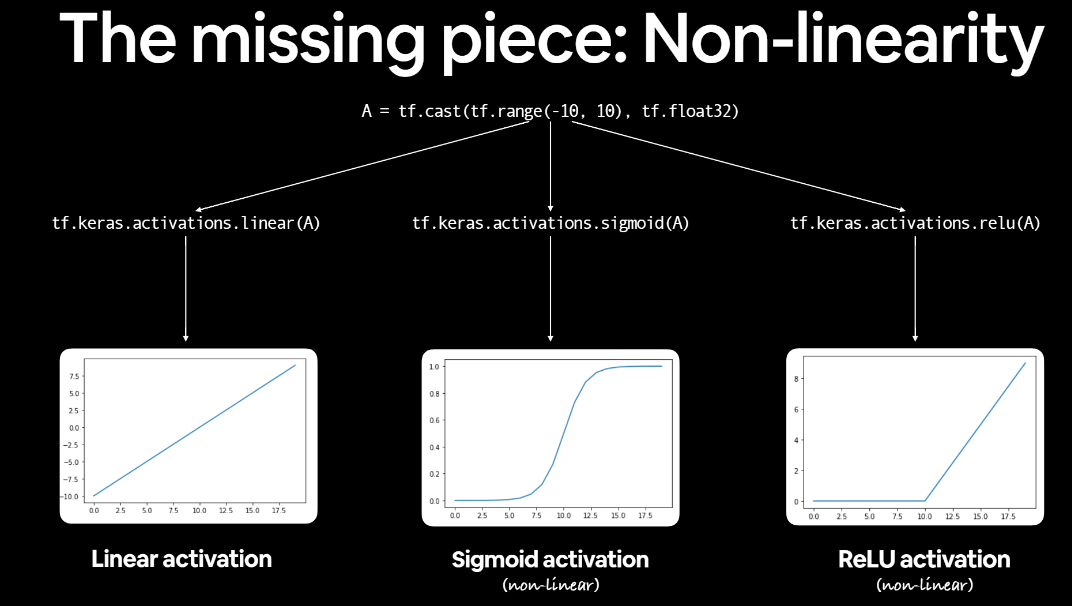

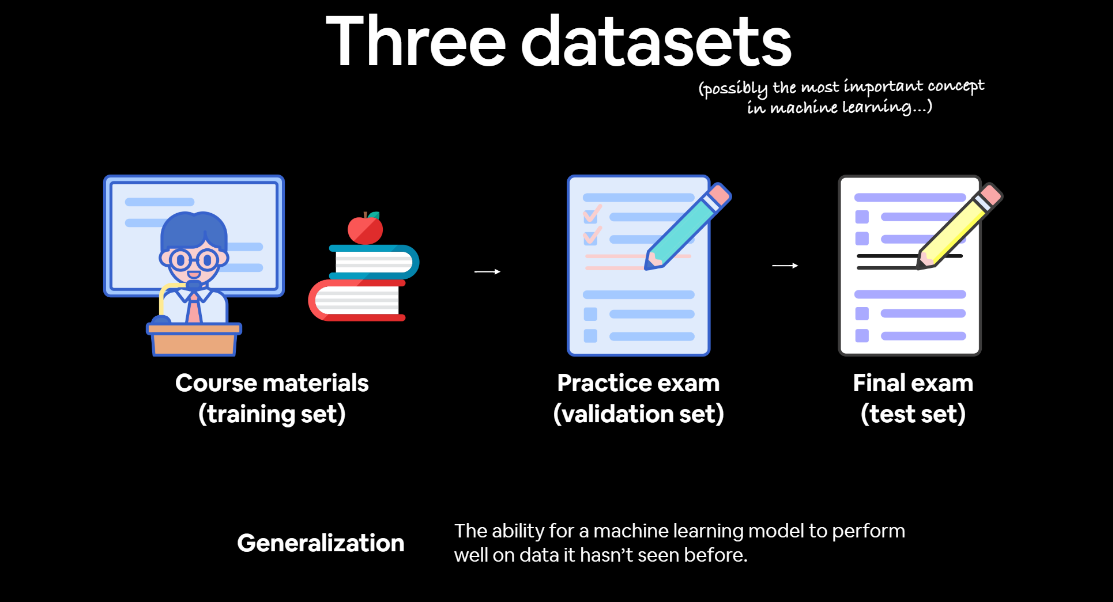

In [40]:
import sklearn
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=32 , test_size=0.2)

In [47]:
tf.random.set_seed(50)

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4 , activation='relu'))
model_7.add(tf.keras.layers.Dense(4 , activation='relu'))
model_7.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                loss = tf.keras.losses.binary_crossentropy, 
                metrics=['accuracy']
               )

history= model_7.fit(X_train , y_train , epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4586 - loss: 0.7260
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4522 - loss: 0.6978
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4288 - loss: 0.6915
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 0.6873
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5499 - loss: 0.6837
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5609 - loss: 0.6803
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5720 - loss: 0.6772
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5708 - loss: 0.6740
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5813 - loss: 0.6714
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5861 - loss: 0.6628
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5890 - loss: 0.6469
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [48]:
model_7.evaluate(X_test , y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0128  


[0.010052957572042942, 1.0]

In [49]:
model_7.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (32, 4)                     │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (32, 4)                     │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (32, 1)                     │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


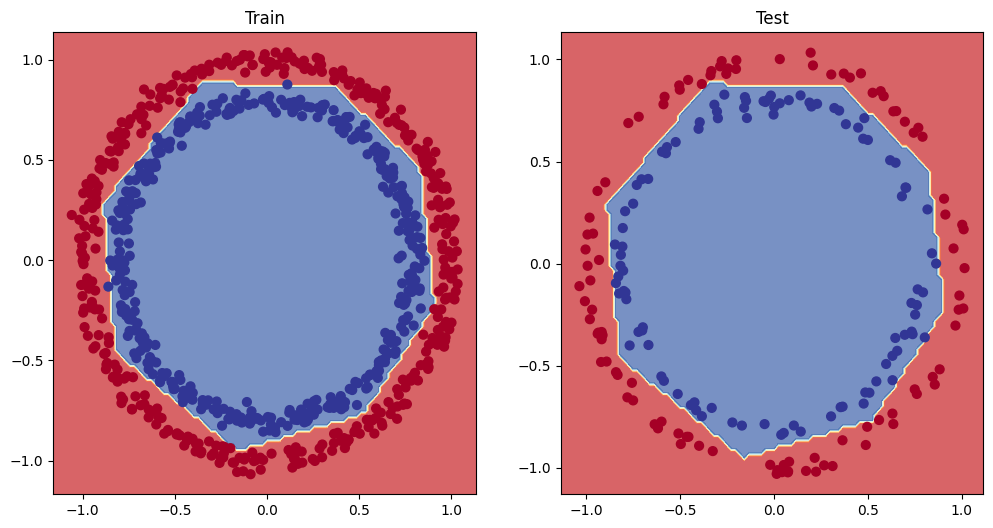

In [50]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_boundry(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_boundry(model_7, X=X_test, y=y_test)
plt.show()

Let's Work with the histroy we saved everytime we fitted out model !

#### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [51]:
history.history

{'accuracy': [0.4337500035762787,
  0.45375001430511475,
  0.4424999952316284,
  0.4937500059604645,
  0.5212500095367432,
  0.5274999737739563,
  0.5362499952316284,
  0.5362499952316284,
  0.5425000190734863,
  0.5575000047683716,
  0.5637500286102295,
  0.6037499904632568,
  0.7212499976158142,
  0.7337499856948853,
  0.7400000095367432,
  0.7900000214576721,
  0.8712499737739563,
  0.9412500262260437,
  0.9549999833106995,
  0.9637500047683716,
  0.9787499904632568,
  0.9900000095367432,
  0.9925000071525574,
  0.9925000071525574,
  0.9925000071525574,
  0.9950000047683716,
  0.9962499737739563,
  0.9962499737739563,
  0.9962499737739563,
  0.9962499737739563,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.998749971389770

In [52]:
hist = pd.DataFrame(history.history)

In [53]:
hist.head()

,accuracy,loss
0,0.43375,0.716300
1,0.45375,0.699305
2,0.44250,0.691986
3,0.49375,0.689022
4,0.52125,0.686842


Text(0.5, 1.0, "Model_7's , loss Curves")

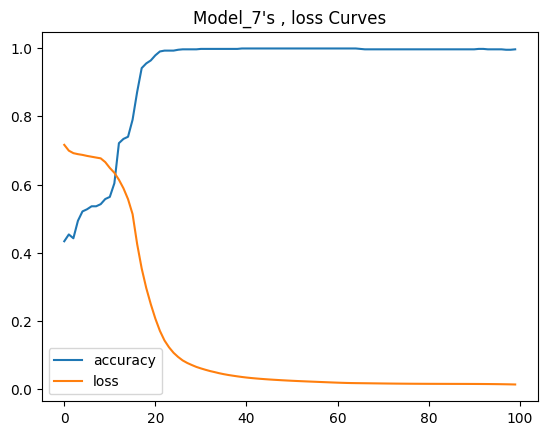

In [54]:
hist.plot()
plt.title("Model_7's , loss Curves")

-  Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Method to Find The Best " LEARNING RATE "

- Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

To find best Learning Rate , we're going to use the following:

- A learning rate callback.
    - You can think of a callback as an extra piece of functionality you can add to your model while its training.
- Another model (we could use the same ones as above, we we're practicing building models here).
- A modified loss curves plot.

- 🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [59]:
# Set Random Seed
tf.random.set_seed(50)

# Create the Model 
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4 , activation='relu'))
model_8.add(tf.keras.layers.Dense(4 , activation='relu'))
model_8.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# Complie the Model 
model_8.compile(
    optimizer="Adam",
    loss="binary_crossentropy", 
    metrics=['accuracy']
)

# Call Back 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit te Model 
history_model_8  = model_8.fit(X_train,
                               y_train,
                               epochs=100, 
                               callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4974 - loss: 0.7266 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 0.7258 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4937 - loss: 0.7250 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4974 - loss: 0.7241 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 0.7232 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 0.7222 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 0.7212 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 0.7201 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4926 - loss: 0.7189 - learning_

<Axes: xlabel='epochs'>

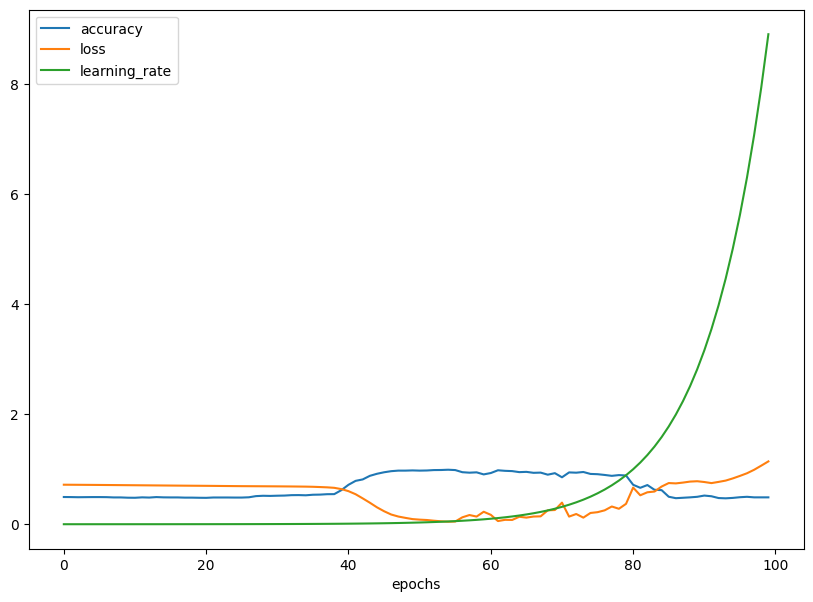

In [61]:
# checkout the history 
history_model_8_df = pd.DataFrame(history_model_8.history)
pd.DataFrame(history_model_8.history).plot(figsize=(10,7) , xlabel="epochs")

In [64]:
history_model_8_df[history_model_8_df['accuracy']==history_model_8_df['accuracy'].max()]

,accuracy,loss,learning_rate
54,0.99125,0.04605,0.050119


Text(0.5, 1.0, 'Learning Rate VS Loss')

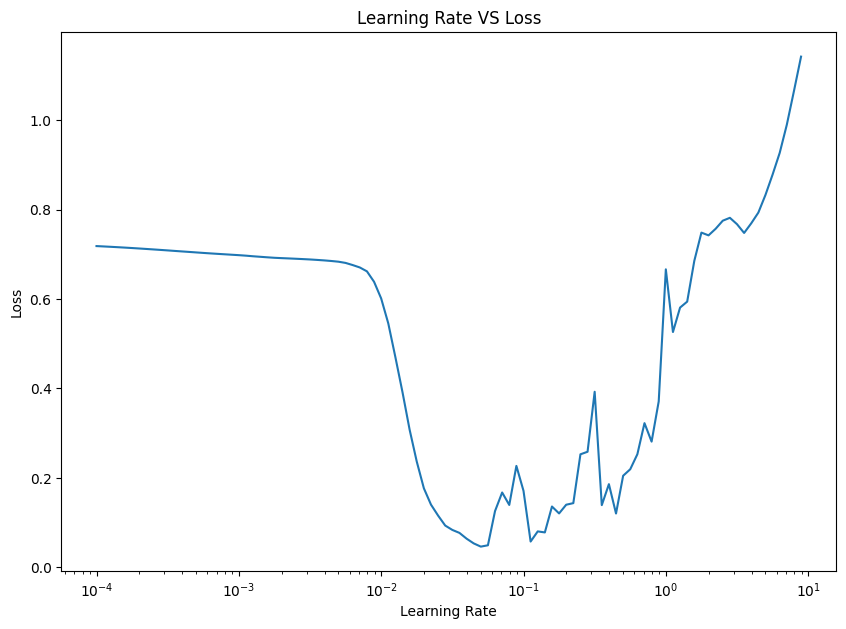

In [65]:
plt.figure(figsize=(10,7))
plt.semilogx(history_model_8_df["learning_rate"] , history_model_8_df['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out **(usually about 10x smaller than the bottom of the curve)**.

In this case ,  **So , On the Basis of this we can conclude that the best learning rate will be => 0.050 for this model**

In [68]:
# Set Random Seed
tf.random.set_seed(50)

# Create the Model 
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4 , activation='relu'))
model_8.add(tf.keras.layers.Dense(4 , activation='relu'))
model_8.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# Complie the Model 
model_8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.050119),
    loss="binary_crossentropy", 
    metrics=['accuracy']
)

# Fit te Model 
history_model_8  = model_8.fit(X_train,
                               y_train,
                               epochs=100) 

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4948 - loss: 0.6963
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 0.6831
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 0.6432
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6648 - loss: 0.5848
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.5345
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7487 - loss: 0.5067
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7498 - loss: 0.4941
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7804 - loss: 0.4706
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8024 - loss: 0.4380
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8115 - loss: 0.4199
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8293 - loss: 0.3985
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

### CLASSIFICATION EVALUATION METHODS

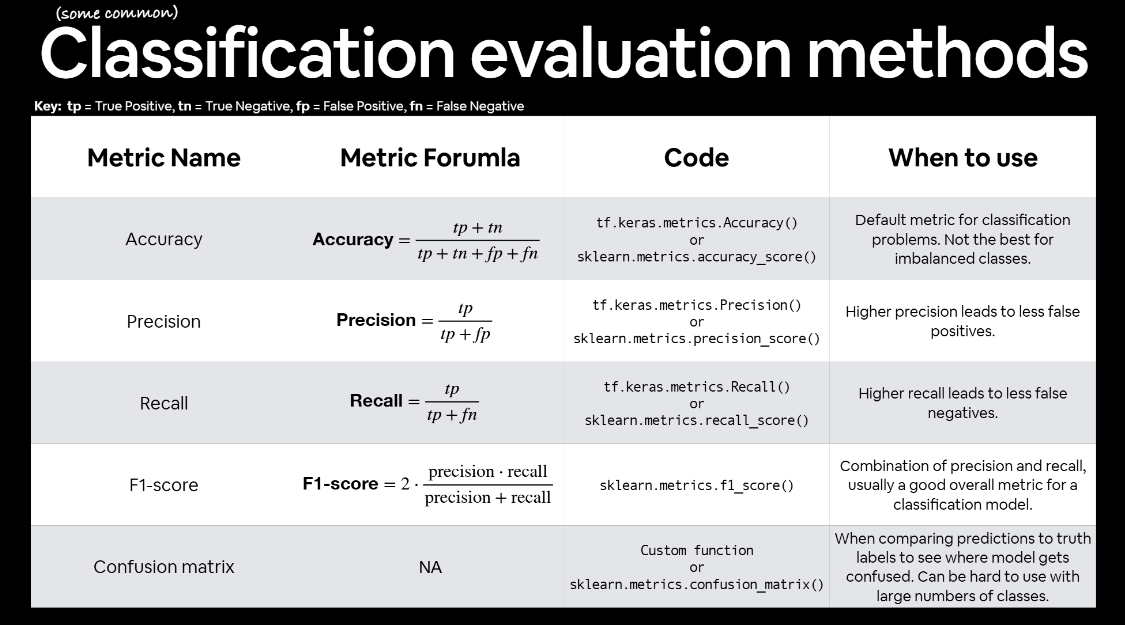

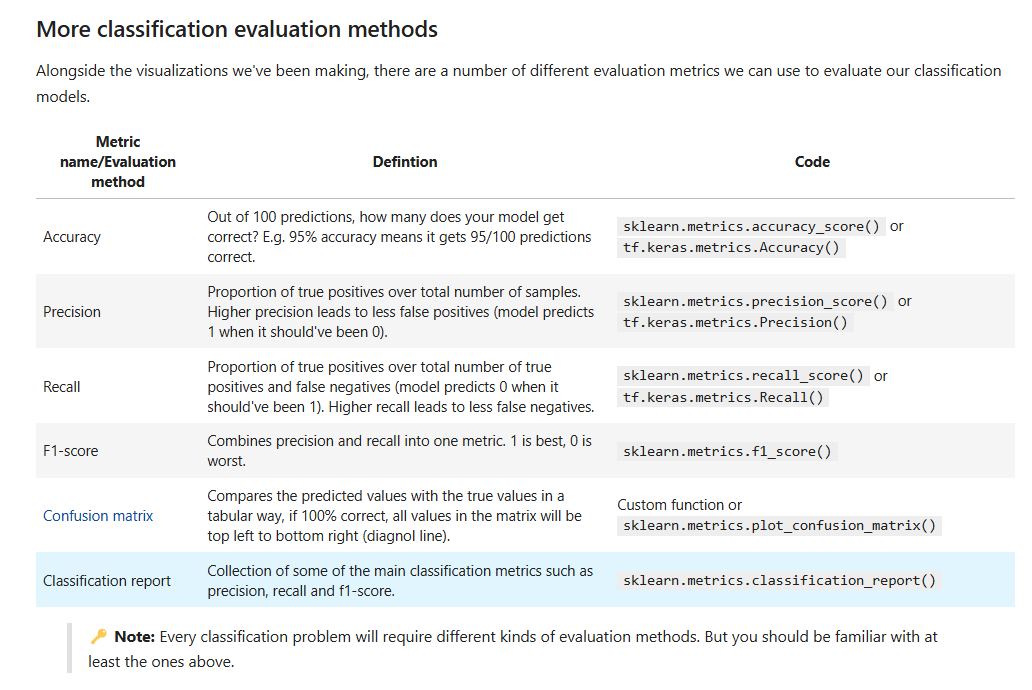